心得:

這次的作業讓我感受到線性代數的重要，投影片中將方程式的係數寫成矩陣，然後用解Ax=b中的x，來拉伸圖片，其中我遇到最麻煩的是選擇角點，一開始我將角點選成不規則的多邊形，結果最後的圖片形狀非常怪，最後我選成平行四邊形，並且選擇合理的目的地結果看起來就合理很多了，不過因為擷取骷髏頭範圍較小和原圖解析度的關係，我最後的成果圖畫質看起來也比較差，可能我要去找到解析度更高的原圖和改變我選取的角點才能解決解析度的問題。

請參考lecture6簡報中p52的畫將畫中骷顱頭影像校正出來

497 504 3


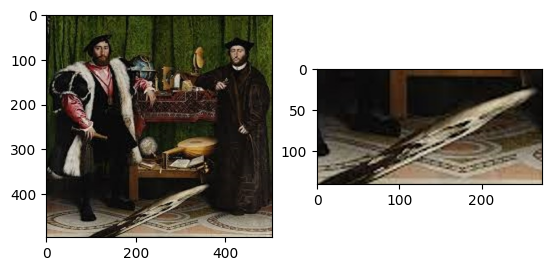

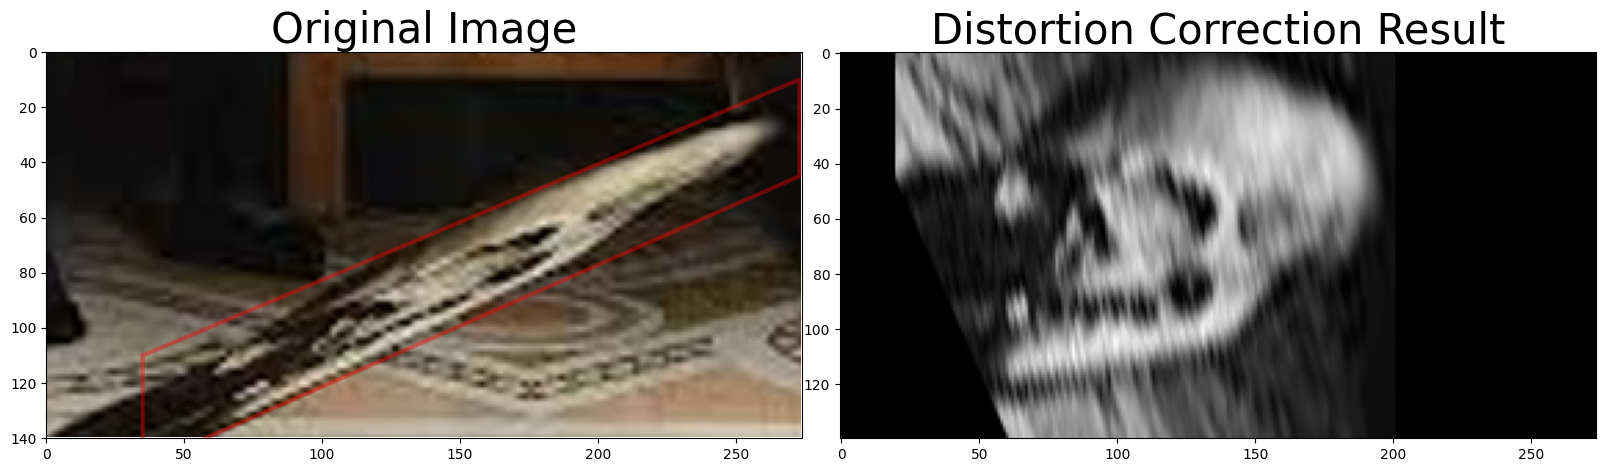

In [48]:
from skimage import io
from skimage import transform
from PIL import Image
from skimage.transform import rescale
import matplotlib.pyplot as plt
import numpy as np
import cv2
def unwarp(img, src, dst, testing):
    img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    h, w = img.shape[:2]
    # use cv2.getPerspectiveTransform() to get M, the transform matrix, and Minv, the inverse
    M = cv2.getPerspectiveTransform(src, dst)
    # use cv2.warpPerspective() to warp your image to a top-down view
    warped = cv2.warpPerspective(img_gray, M, (w, h), flags=cv2.INTER_LINEAR)

    if testing:

        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
        f.subplots_adjust(hspace=.2, wspace=.05)
        ax1.imshow(img)
        x = [src[0][0], src[2][0], src[3][0], src[1][0], src[0][0]]
        y = [src[0][1], src[2][1], src[3][1], src[1][1], src[0][1]]
        ax1.plot(x, y, color='red', alpha=0.4, linewidth=3, solid_capstyle='round', zorder=2)
        ax1.set_ylim([h, 0])
        ax1.set_xlim([0, w])
        ax1.set_title('Original Image', fontsize=30)
        ax2.imshow(warped,cmap='gray')
        ax2.set_title('Distortion Correction Result', fontsize=30)
        plt.show()
    else:
        return warped, M


a = io.imread('ambassadors.jpg')
w,h,d=a.shape
print(w,h,d)
skull = a[355:495,97:371]
skull_img=io.imsave('skull.jpg',skull)
src = np.float32([
    (35,110),
    (273,10),
    (35,150),
    (273,45)])

dst = np.float32([
    (40,0),
    (200,0),
    (40,125),
    (200,125),
])
fig = plt.figure()
# plt.gray()  # show the filtered result in grayscale
ax1 = fig.add_subplot(121)  # left side
ax2 = fig.add_subplot(122)  # right side

ax1.imshow(a)
ax2.imshow(skull)

unwarp(skull,src,dst,True)
w,m=unwarp(skull,src,dst,False)
w=Image.fromarray(w)
w_gray=w.convert('L')
w_gray.save('result.jpg')
plt.show()